# What's the data is about ?????

> The state farm wants to predict the interest rate for different types loan depending on different features like borrower salary, amount requested,Employement, Home ownership status, number of payments, number of months since borrower's last delinquency and so on. 



## Tools used

> Python- 2.7.11 

> Packages : Pandas, Seaborn, Numpy, Sklearn

> Anaconda 2.5.0 – Spyder 2.8 development platform

> Jupytor – Ipython 4.0.3 

This is one of the data challenges i worked on, total time spent on this analysis is 3 hours.


In [1]:
# importing all important packages

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from rep.estimators import XGBoostRegressor
from IPython.display import Image

%matplotlib inline 

## Loading the data which is in csv format
SF_Train=pd.read_csv(r'G:\State Farm Data Science WORK SAMPLE\Data for Cleaning & Modeling.csv',low_memory=False)

## Lets see how the data is 
SF_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 0 to 399999
Data columns (total 32 columns):
X1     338990 non-null object
X2     399999 non-null float64
X3     399999 non-null float64
X4     399999 non-null object
X5     399999 non-null object
X6     399999 non-null object
X7     399999 non-null object
X8     338730 non-null object
X9     338730 non-null object
X10    376018 non-null object
X11    399999 non-null object
X12    338639 non-null object
X13    338972 non-null float64
X14    399999 non-null object
X15    399999 non-null object
X16    123561 non-null object
X17    399999 non-null object
X18    399982 non-null object
X19    399999 non-null object
X20    399999 non-null object
X21    399999 non-null float64
X22    399999 non-null float64
X23    399999 non-null object
X24    399999 non-null float64
X25    181198 non-null float64
X26    51155 non-null float64
X27    399999 non-null float64
X28    399999 non-null float64
X29    399999 non-null float64
X30    39

The data is totally 110 mb of size, with 400,000 rows X 32 columns which has interest rate as target with 31 features.  
from meta data the features are as below 

Variable	Definition	
   X1	Interest Rate on the loan	( Target )   
   X2	A unique id for the loan.	
   X3	A unique id assigned for the borrower.	
   X4	Loan amount requested	
   X5	Loan amount funded	
   X6	Investor-funded portion of loan	
   X7	Number of payments (36 or 60)	
   X8	Loan grade	
   X9	Loan subgrade	
   X10	Employer or job title (self-filled)	
   X11	Number of years employed (0 to 10; 10 = 10 or more)	
   X12	Home ownership status: RENT, OWN, MORTGAGE, OTHER.	
   X13	Annual income of borrower	
   X14	Income verified, not verified, or income source was verified	
   X15	Date loan was issued	
   X16	Reason for loan provided by borrower	
   X17	Loan category, as provided by borrower	
   X18	Loan title, as provided by borrower	
   X19	First 3 numbers of zip code	
   X20	State of borrower	
   X21	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.	
   X22	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years	
   X23	Date the borrower's earliest reported credit line was opened	
   X24	Number of inquiries by creditors during the past 6 months.	
   X25	Number of months since the borrower's last delinquency.	
   X26	Number of months since the last public record.
   X27	Number of open credit lines in the borrower's credit file.	
   X28	Number of derogatory public records values  knn can be used to fill	
   X29	Total credit revolving balance	
   X30	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.	
   X31	The total number of credit lines currently in the borrower's credit file	
   X32	The initial listing status of the loan. Possible values are – W, F	


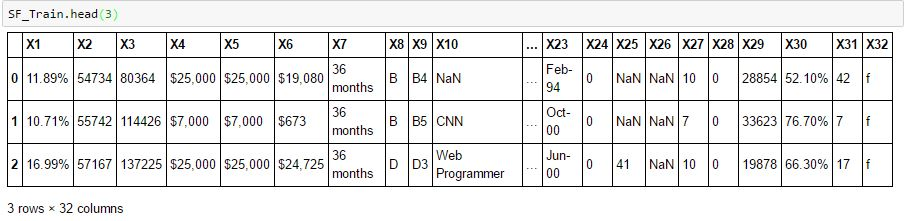

In [6]:
#SF_Train.head(3)

Image(filename=r'G:\State Farm Data Science WORK SAMPLE\head.jpg')  

we can observe that data is mixer of symbols such as %,$. First we need to remove these symbol from the data. 

# Data Preprocessing
## Removing the special characters

In [4]:
SF_Train.drop([364111],inplace=True) ## as this has 31 missing values 
### Removing the $ and , from the features X4,X5,X6    
for i in ('X4','X5','X6'):
    SF_Train[i]=SF_Train[i].map(lambda x:str(x).replace('$',''))
    SF_Train[i]=SF_Train[i].map(lambda x:str(x).replace(',',''))           ## Converting to integer
    SF_Train[i]=SF_Train[i].astype(int)


In [5]:
### Removing the % from the features X1,X30
for i in ('X1','X30'):
    SF_Train[i]=SF_Train[i].str.replace('%', '')    
    #SF_Train[i]=SF_Train[i].astype(float)  ## Coverting to float 
    SF_Train[i]=SF_Train[i].map(lambda x: round(float(x)/100,4))


The X1, X30 are reflecting as object data type instead of float due to '%' character.Remove it and convert to float.I have divided the value by 100 as it is percentage.


In [18]:
SF_Train.describe()

,X1,X2,X3,X4,X5,X6,X13,X21,X22,X24,X25,X26,X27,X28,X29,X30,X31
count,338989.000000,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,338972.000000,399999.000000,399999.000000,399999.000000,181198.000000,51155.000000,399999.000000,399999.000000,399999.000000,399733.000000,399999.000000
mean,0.139463,9984493.115183,11338985.999332,14274.064685,14245.761364,14182.979152,73160.149695,17.000786,0.274528,0.817155,34.312117,76.320399,11.117953,0.152285,15956.052790,0.562791,24.983010
std,0.043779,7928778.249623,8663918.266247,8251.453344,8236.935359,8250.994916,55867.696483,7.704189,0.778209,1.058746,21.787313,29.804509,4.898569,0.497389,19528.108922,0.237342,11.473478
min,0.054200,54734.000000,70699.000000,500.000000,500.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.109900,3151742.500000,3727711.500000,8000.000000,8000.000000,8000.000000,45000.000000,11.250000,0.000000,0.000000,16.000000,54.000000,8.000000,0.000000,6453.000000,0.395000,17.000000
50%,0.136800,8234778.000000,9667699.000000,12000.000000,12000.000000,12000.000000,63000.000000,16.700000,0.000000,0.000000,31.000000,80.000000,10.000000,0.000000,11778.000000,0.578000,23.000000
75%,0.167800,15329598.500000,17312191.500000,20000.000000,20000.000000,19900.000000,88200.000000,22.520000,0.000000,1.000000,50.000000,103.000000,14.000000,0.000000,20209.000000,0.749000,32.000000
max,0.260600,28753146.000000,31278050.000000,35000.000000,35000.000000,35000.000000,7500000.000000,39.990000,29.000000,8.000000,188.000000,129.000000,76.000000,63.000000,2568995.000000,8.923000,121.000000


## Understanding the features and how they are related 

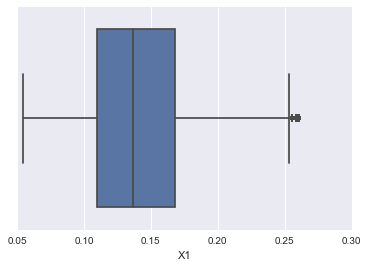

In [19]:
sns.boxplot(SF_Train['X1'])

In [23]:
SF_Train.corr()

,X1,X2,X3,X4,X5,X6,X13,X21,X22,X24,X25,X26,X27,X28,X29,X30,X31
X1,1.000000,0.033545,0.035069,0.177732,0.178727,0.181031,-0.032207,0.158111,0.091661,0.210398,-0.058441,-0.034513,0.020455,0.073577,0.008171,0.342609,-0.027147
X2,0.033545,1.000000,0.994894,0.074648,0.078812,0.087005,0.032964,0.119845,0.078974,-0.015826,-0.040541,-0.159457,0.115167,0.122491,0.022592,-0.007783,0.093876
X3,0.035069,0.994894,1.000000,0.077571,0.081868,0.090367,0.033507,0.118335,0.078849,-0.017545,-0.040254,-0.153880,0.113991,0.124480,0.022683,-0.006541,0.092768
X4,0.177732,0.074648,0.077571,1.000000,0.998358,0.994675,0.359734,0.060622,0.008905,-0.002423,-0.041572,0.009126,0.204428,-0.078938,0.336650,0.117066,0.237455
X5,0.178727,0.078812,0.081868,0.998358,1.000000,0.996634,0.359130,0.062106,0.009519,-0.002642,-0.041704,0.008723,0.205362,-0.078351,0.336277,0.118395,0.237338
X6,0.181031,0.087005,0.090367,0.994675,0.996634,1.000000,0.357265,0.065765,0.010339,-0.004095,-0.038505,0.042647,0.206348,-0.076846,0.334836,0.120670,0.237691
X13,-0.032207,0.032964,0.033507,0.359734,0.359130,0.357265,1.000000,-0.183002,0.060688,0.064709,-0.057152,-0.099963,0.154522,-0.016127,0.325022,0.033673,0.222566
X21,0.158111,0.119845,0.118335,0.060622,0.062106,0.065765,-0.183002,1.000000,-0.002000,0.000231,0.005659,0.083346,0.305150,-0.046224,0.147926,0.206807,0.229761
X22,0.091661,0.078974,0.078849,0.008905,0.009519,0.010339,0.060688,-0.002000,1.000000,0.024421,-0.578255,-0.075937,0.061907,-0.009066,-0.030508,-0.011352,0.133576
X24,0.210398,-0.015826,-0.017545,-0.002423,-0.002642,-0.004095,0.064709,0.000231,0.024421,1.000000,0.006220,-0.088601,0.099851,0.039298,-0.015203,-0.096061,0.134220


X1 i.e interest rates is a continuous variable which has 0.1525% of missing values and has some outliers

X2,X3 are unique id's for loan and loan barrower, so we can drop them from our model

### Checking the correlation between the features 

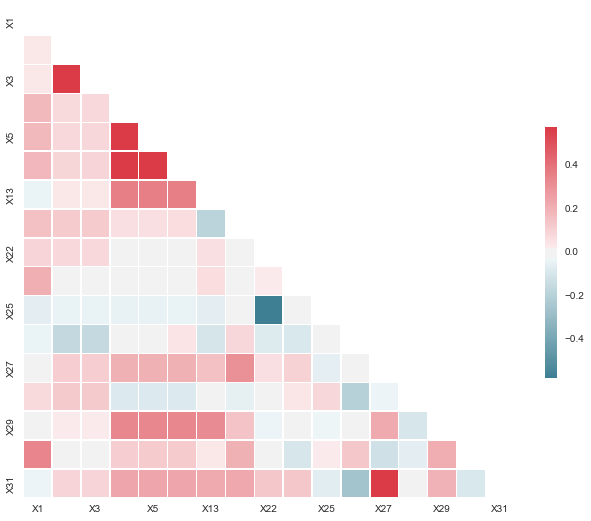

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = SF_Train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

C:\Users\NOW R NEVER\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\NOW R NEVER\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


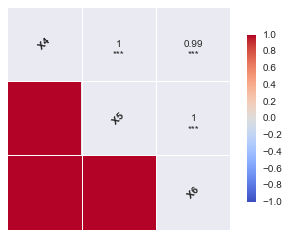

In [6]:
sns.corrplot(SF_Train[['X4','X5','X6']])

In [ ]:
#sns.heatmap(SF_Train[['X4','X5','X6']])

X4,X5,X6 Loan amount requested, Loan amount funded,investor-funded portion of loan are correlated, so we can select one and use it in model. As its know fact that what ever the loan amount is requested by barrower,after all consideration loan amount will be finalised with respective to interest rate.So, X4, X6 is dropped and Loan amount funded(X5) is used in the model.

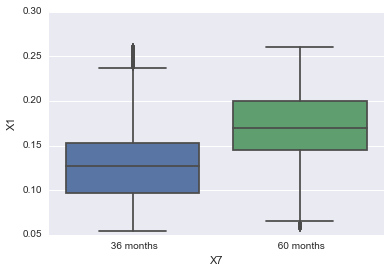

In [5]:
sns.boxplot(x='X7',y='X1',data=SF_Train)

There are many outliers in the X7 with respective to interest rates. It is clear that as number of payments increases the interest rate also increases 

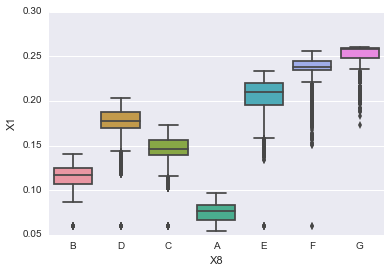

In [6]:
sns.boxplot(x="X8", y="X1", data=SF_Train)

From this it is clear that Loan grade G has higher interest rates while Loan grade A has low interest rates.

X9 which is a loan subgrade which is correlated with Loan grade, so either of these can be dropped.



In [7]:
SF_Train['X10'].head()

0                       NaN
1                       CNN
2            Web Programmer
3    city of beaumont texas
4      State Farm Insurance
Name: X10, dtype: object

X10 is the Employer or job title (self-filled) which is a text and it has many missing values. Some fields has their company name , so this means X10 doesn't has impact in determining the interest rates. 

In [8]:
## Handling X11 
## replace the n/a with 0
SF_Train['X11'] = SF_Train['X11'].map(lambda x: '0.5 years' if x == '< 1 year' else x)
SF_Train['X11'] = SF_Train['X11'].map(lambda x: '10 years' if x == '10+ years' else x)
SF_Train['X11'] = SF_Train['X11'].map(lambda x: '0 years' if x == 'n/a' else x)
SF_Train['X11'] = SF_Train['X11'].map(lambda x: float(x.strip(' years')))


In X11 Number of years of experience, has values like 10+ years, <1 years ,n/a 
Converted them into proper format and removed the characters

## Missng values 
### Checking the missing values row wise and column wise

In [11]:
## printing the rows which has column values less than 50 % 
for i in SF_Train.count(axis=1):
    #print i
    if i <=16:
        print i

There is a row which has all missing values 31 columns, so it is dropped

In [ ]:
SF_Train.drop([364111],inplace=True)


In [12]:
## missing values column wise , to get a clear idea i have subsetted the missing 
## and their total percentage 
Missing_data=pd.DataFrame(columns=['feature','f_type','m_count','m_per','del'])
j=0
for i in SF_Train.columns:
    if SF_Train[i].isnull().sum():
        Missing_data.loc[j,'feature']=i
        Missing_data.loc[j,'f_type']= SF_Train[i].dtype
        Missing_data.loc[j,'m_count']= SF_Train[i].isnull().sum()
        Missing_data.loc[j,'m_per']=SF_Train[i].isnull().sum()/float(SF_Train.shape[0])
        Missing_data.loc[j,'levels']=len(SF_Train[i].value_counts().index)
        Missing_data.loc[j,'del']=((SF_Train[i].isnull().sum()/float(SF_Train.shape[0]))>0.5).astype(int)
        #print i, SF_Train[i].head(2),len(SF_Train[i].value_counts().index)
        j=j+1        
    
Missing_data

,feature,f_type,m_count,m_per,del,levels
0,X1,float64,61010,0.152525,0,482
1,X8,object,61269,0.153173,0,7
2,X9,object,61269,0.153173,0,35
3,X10,object,23981,0.0599526,0,187822
4,X12,object,61360,0.1534,0,6
5,X13,float64,61027,0.152568,0,25302
6,X16,object,276438,0.691097,1,122043
7,X18,object,17,4.25001e-05,0,61630
8,X25,float64,218801,0.547004,1,143
9,X26,float64,348844,0.872112,1,123


The features X16,X25,X26 contains more than 50% of missing values and can dropped from model. 



In [13]:
(SF_Train['X9'][SF_Train['X8'].isnull()]).isnull().sum()

61269

Understanding the relation between X9 and X8:

X8 – Loan Grade 

X9 – Loan Subgrade 

I tried to understand the relationship between X8, X9 they are both are linked and they have same number of missing values.
X9 has 35 levels and allows to identify the patterns easily. So X8 can be dropped.

The missing values in X9 are filled by mode 

### Is there any relation between loan grade and interest rate

In [14]:
for i in SF_Train['X8'].value_counts().index:
    print i,np.min(SF_Train['X1'][SF_Train['X8']==i]),np.max(SF_Train['X1'][SF_Train['X8']==i]),np.mean(SF_Train['X1'][SF_Train['X8']==i])
        


B 0.06 0.1409 0.116085893104
C 0.06 0.1727 0.147944942836
D 0.06 0.2031 0.177176142942
A 0.0542 0.0963 0.0757727732015
E 0.06 0.234 0.206553740522
F 0.06 0.2557 0.236062358547
G 0.1734 0.2606 0.251415316206


The Loan grades ranges very closly and pattern is not clear.

### Is there any relation between loan grade and Annual income

In [15]:
for i in SF_Train['X8'].value_counts().index:
    print i,np.min(SF_Train['X13'][SF_Train['X8']==i]),np.max(SF_Train['X13'][SF_Train['X8']==i]),np.mean(SF_Train['X13'][SF_Train['X8']==i])
        


B 4080.0 7141778.0 71510.5734594
C 4000.0 6000000.0 70489.2974411
D 4800.0 1510000.0 70293.4340524
A 5500.0 7446395.0 81627.8178369
E 3000.0 7500000.0 74739.1657082
F 7740.0 1050000.0 76213.86383
G 9624.0 900000.0 87028.1476508


The Loan grades ranges very closly with respective to annual income and pattern is not clear.
The Employer or job title (self-filled) i.e X10 has 187822 levels with 23981 missing values, so as of now it can be ignored in model

### Is there any relation between Home owner status and interest rate


In [16]:

for i in SF_Train['X12'].value_counts().index:
    print i,np.min(SF_Train['X1'][SF_Train['X12']==i]),np.max(SF_Train['X1'][SF_Train['X12']==i]),np.mean(SF_Train['X1'][SF_Train['X12']==i])
        

MORTGAGE 0.0542 0.2606 0.136629877773
RENT 0.0542 0.2606 0.142537232446
OWN 0.0542 0.2606 0.140925692665
OTHER 0.074 0.2363 0.130771028037
NONE 0.0762 0.2489 0.141663333333
ANY 0.1167 0.1167 0.1167


This shows that Home owner status and interest rate doesn't a notable pattern


The feature X16 i.e Reason for loan provided by borrower has more than 50% missing values with 122043 levels, so it can be ignored in model. Similarly X18 i.e Title provided by borrower has 61630 levels so it can ignored in model.

The Missing values in categorical features are replaced with most repeated values and the numerical features are replaced with meidan.

Finally all the categorical features are converted to numerical by creating dummies from them.

### Steps performed till now:

> 1.Handelled the special characters in the data.

> 2.Verified the data types and converted them to respective where ever possible.

> 3.Addressed missing values. 

> 4.Dropped non-informative features. 

> 5.Handelled high correlated data.

> 6.Converted categorical features to numerical.

# Data modeling 

> After the preprocessing steps cleaned data is having 74 columns and 338989 rows. 

> Divided the data into train and test with 75:25 ratio.

> I have used Ridge and Random forest regressor models to predict the interest rates with root mean square error as metric. 

> To Check whether model is overfitting or not K-fold Cross validation is performed.

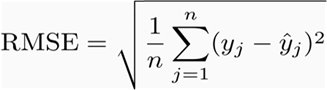

In [4]:
# Metric : Root Mean Square Error

Image(filename=r'G:\Vybhav\rmse4.jpg')    


### Results of Ridge regression with 10-fold cross validation 


    Train       : 0.826672

    Validation 	: 0.831106

    RMSE 	    : 0.018050


### Results of Randomforest with 10-fold cross validation 

    RMSE       : 0.012511


### Future Improvements and suggestions

> Due to time constraints feature engineering could not be done, engineering features could be of greater value to the model.

> Missing values can be imputed (using knn, random forest or SVM) better instead of imputing with mean and median.

> Multiple models can be run instead of just two.

> Random forest bag sizes can be tuned to improve the number of data reads, given more time.
